In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from PRPlot import PRPlot
from MetrPlot import MetrPlot

In [2]:
warnings.simplefilter('ignore')

In [3]:
from npls import npls

In [4]:
d=np.load('2021-11-17.npz')

In [6]:
d.files

['X', 'Y', 'Em', 'Ex', 'B0', 'C0']

In [7]:
d['Em'].shape

(351,)

In [9]:
d['B0'].shape

(351, 4)

In [10]:
import matplotlib.gridspec as gridspec

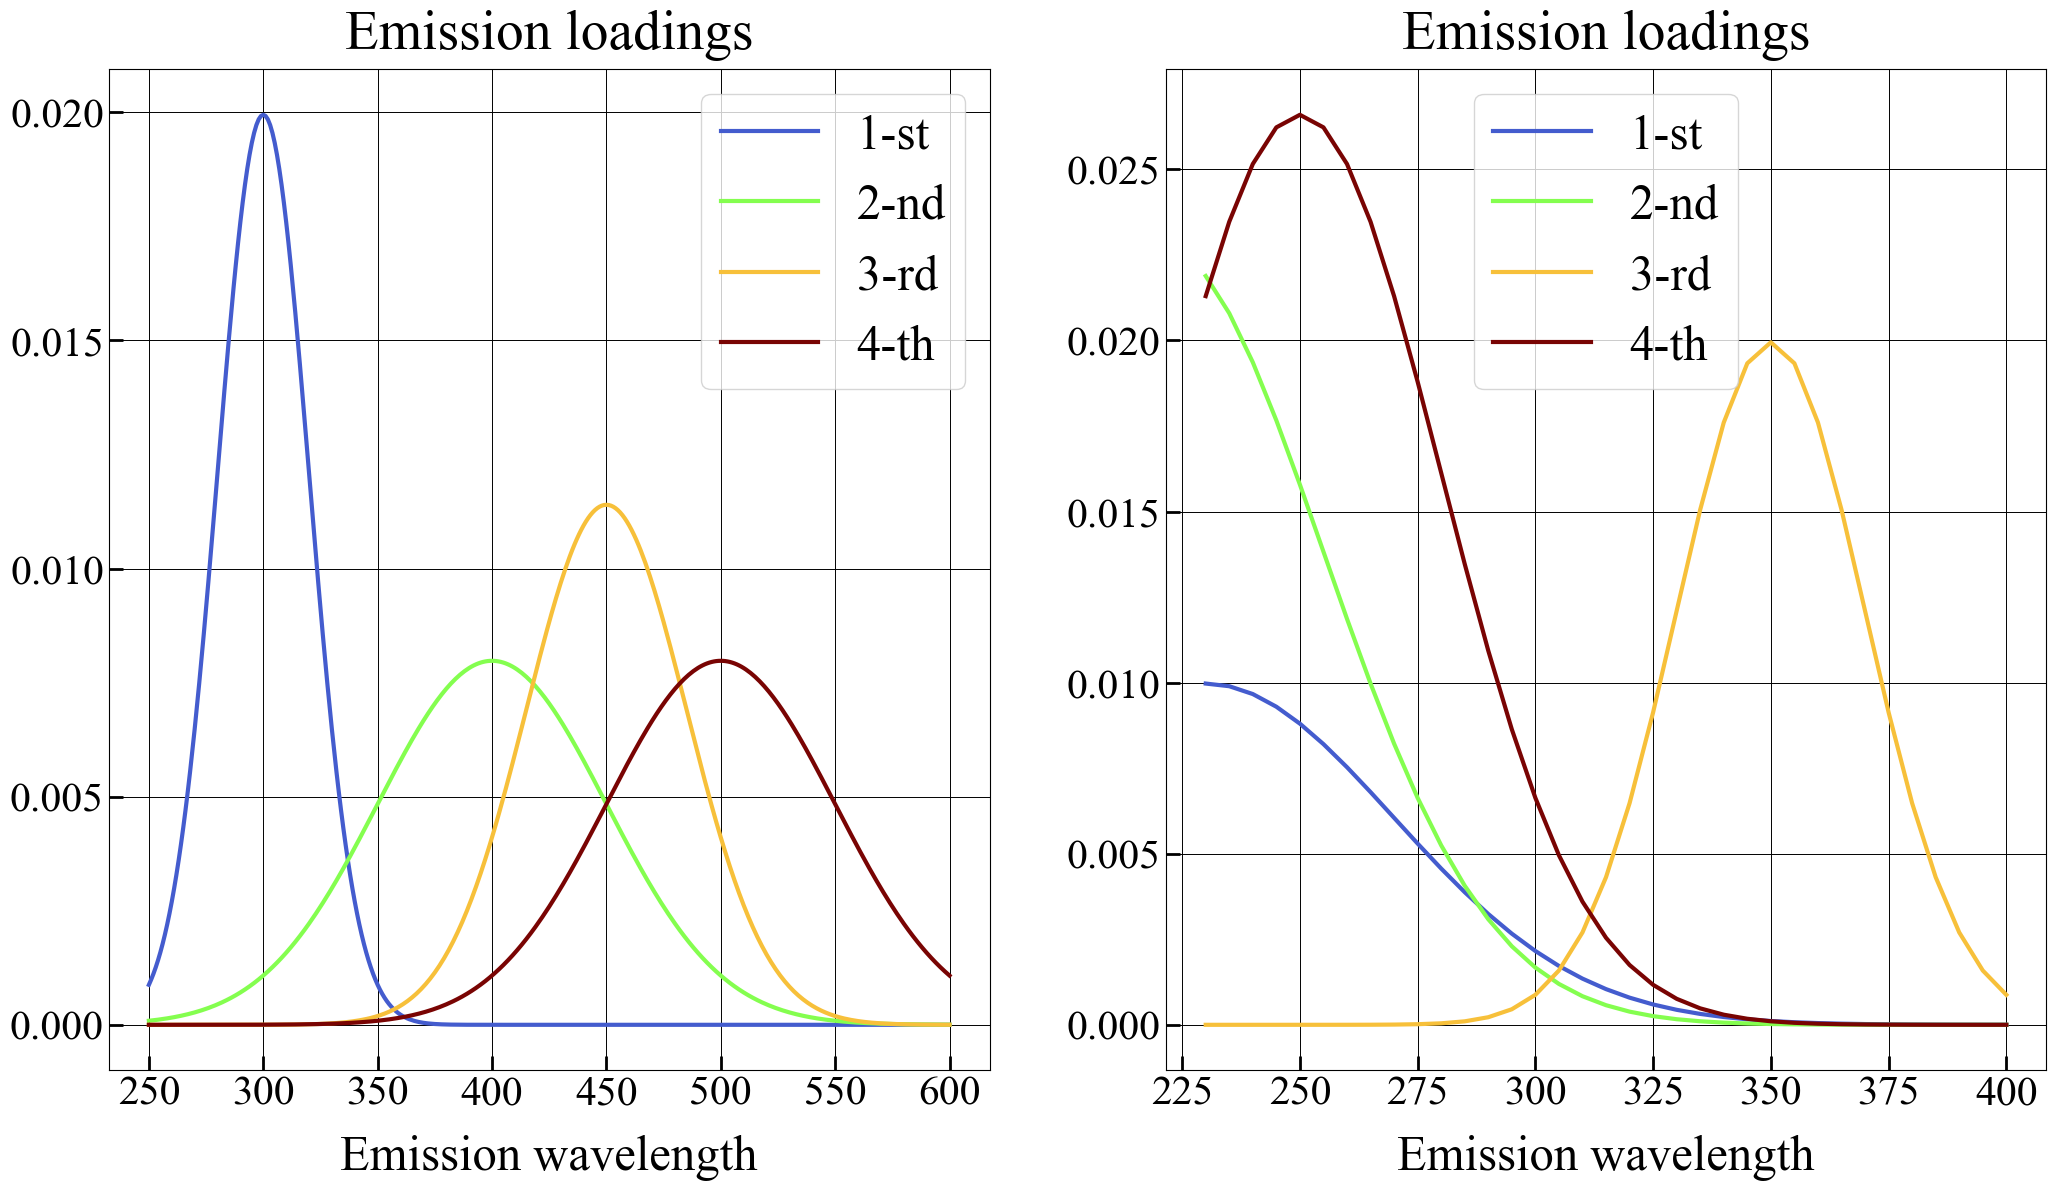

In [26]:
mpl.rc('font',family='Times New Roman')
fg = plt.figure(figsize=(25, 13),constrained_layout=False)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

# plt.subplots_adjust(wspace=0.35)

fig_ax_1 = fg.add_subplot(gs[0,0])
fig_ax_1.plot(d['Em'],d['B0'][:,0],"-",lw=3,label="1-st",color='#445cce')
fig_ax_1.plot(d['Em'],d['B0'][:,1],"-",lw=3,label="2-nd",color='#84fe4f')
fig_ax_1.plot(d['Em'],d['B0'][:,2],"-",lw=3,label="3-rd",color='#f7c03a')
fig_ax_1.plot(d['Em'],d['B0'][:,3],"-",lw=3,label="4-th",color='#790403')
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("Emission wavelength",  {'fontname':'Times New Roman'},  fontsize=35,labelpad=15)
fig_ax_1.set_title("Emission loadings",  {'fontname':'Times New Roman'}, fontsize=40,loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
fig_ax_1.legend(loc='best',fontsize=35)
fig_ax_1.set_yticks([0.005*i for i in range(5)])
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(),fontsize=30)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(),fontsize=30)

fig_ax_1 = fg.add_subplot(gs[0,1])
fig_ax_1.plot(d['Ex'],d['C0'][:,0],"-",lw=3,label="1-st",color='#445cce')
fig_ax_1.plot(d['Ex'],d['C0'][:,1],"-",lw=3,label="2-nd",color='#84fe4f')
fig_ax_1.plot(d['Ex'],d['C0'][:,2],"-",lw=3,label="3-rd",color='#f7c03a')
fig_ax_1.plot(d['Ex'],d['C0'][:,3],"-",lw=3,label="4-th",color='#790403')
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("Emission wavelength",  {'fontname':'Times New Roman'},  fontsize=35,labelpad=15)
fig_ax_1.set_title("Emission loadings",  {'fontname':'Times New Roman'}, fontsize=40,loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
fig_ax_1.legend(loc='best',fontsize=35)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(),fontsize=30)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(),fontsize=30)

plt.savefig('../Work/images/SVG/fig1/first_cmocean.svg',bbox_inches='tight',format='svg')
plt.savefig('../Work/images/PNG/fig1/first_cmocean.pdf',bbox_inches='tight',format='pdf',dpi=300)

plt.show()


In [27]:
df1=pd.DataFrame(d['Y'],columns=['first','second','third','fourth'])
df1.head()

,first,second,third,fourth
0,0.238760,0.755458,0.266755,0.675089
1,0.350027,0.295550,0.856604,0.987310
2,0.750159,0.143892,0.171299,0.618087
3,0.036591,0.645636,0.759917,0.749556
4,0.707175,0.878019,0.772606,0.840103


In [31]:
pip install cmocean

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 KB 810.1 kB/s eta 0:00:00 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import cmocean as cm

In [36]:
import seaborn as sns

In [29]:
corr = df1.corr()
corr.style.set_precision(2).background_gradient(cmap='turbo')

,first,second,third,fourth
first,1.00,0.02,-0.10,-0.00
second,0.02,1.00,0.03,0.02
third,-0.10,0.03,1.00,-0.05
fourth,-0.00,0.02,-0.05,1.00


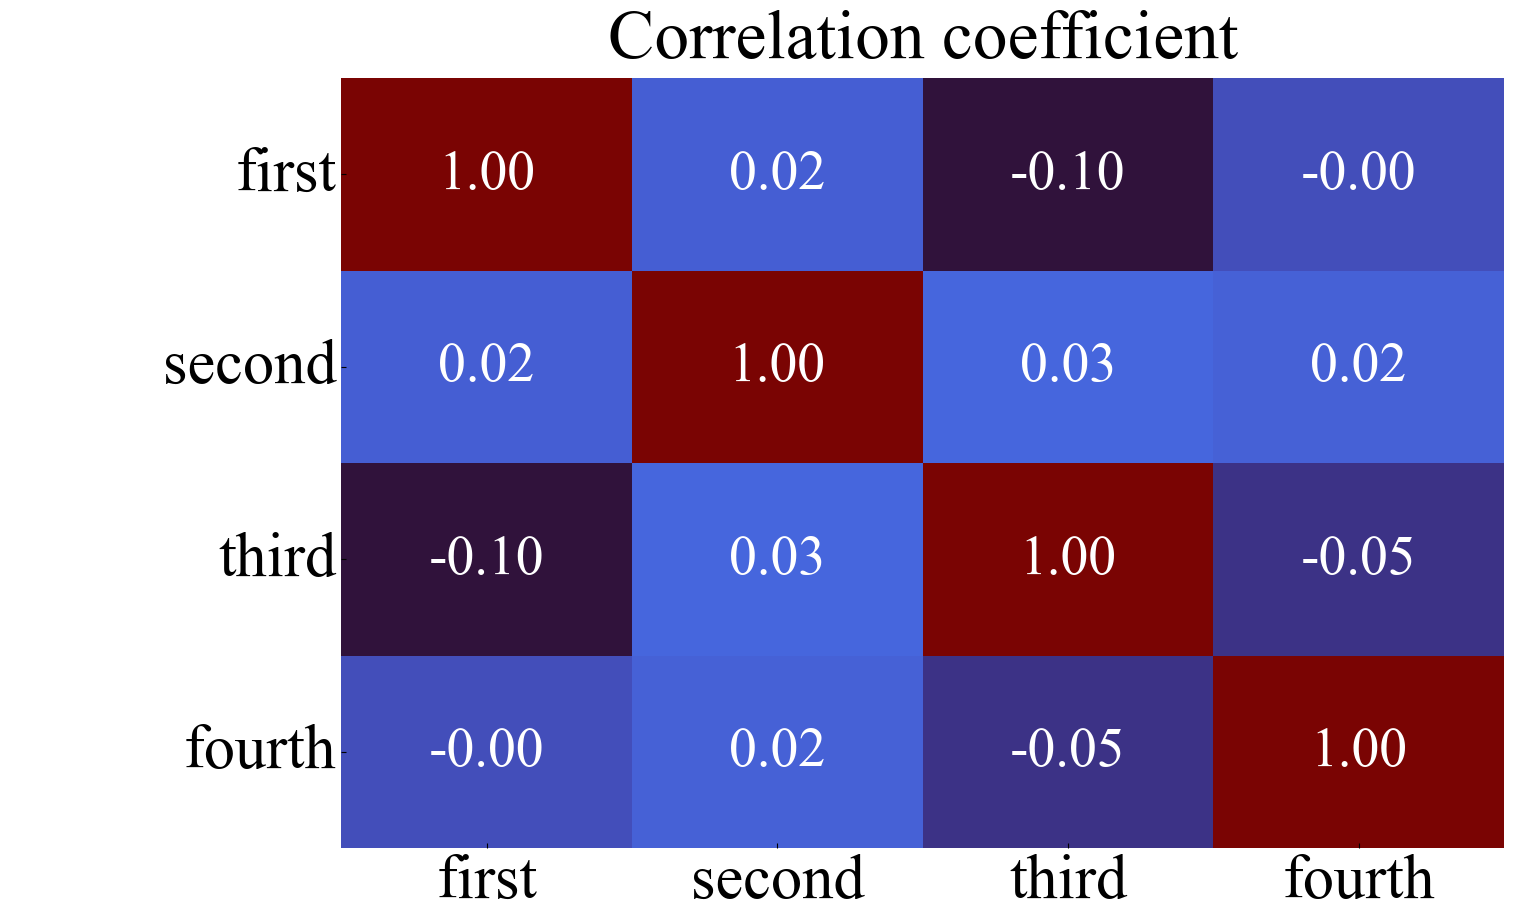

In [42]:
mpl.rc('font',family='Times New Roman')
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,annot=True, fmt='.2f', 
            cmap=plt.get_cmap('turbo'), cbar=False, ax=ax,
            annot_kws={'size':40})
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal",fontsize=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal",fontsize=45)
ax.get_xaxis().set_tick_params(direction='in')
ax.get_yaxis().set_tick_params(direction='in')
ax.set_ylabel(' ',labelpad=100)
# ax.title("Emission coef corr",fontsize=30)
ax.set_title("Сorrelation coefficient", fontsize=50,loc="center" ,pad=15)
# ax.tick_params(labelsize=20)

plt.savefig('../Work/images/SVG/fig2/syn_corr_y_two.svg', format='svg',bbox_inches='tight')
plt.savefig('../Work/images/PNG/fig2/syn_corr_y_two.pdf', format='pdf',dpi=300,bbox_inches='tight')

NPLS Predict_reference

In [43]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [44]:
from npls import npls

In [45]:
X=d['X']
X*=1e7
trtrt=X.mean(axis = 0)
y=d['Y']
X -= X.mean(axis = 0)
y*=1e1

In [46]:
y_mean=list()

In [47]:
for i in range(4):
  print(i)
#   y[:,i]*=1e6
  aaa=y[:,i].mean()
  y_mean.append(aaa)
  y[:,i]-=aaa

0
1
2
3


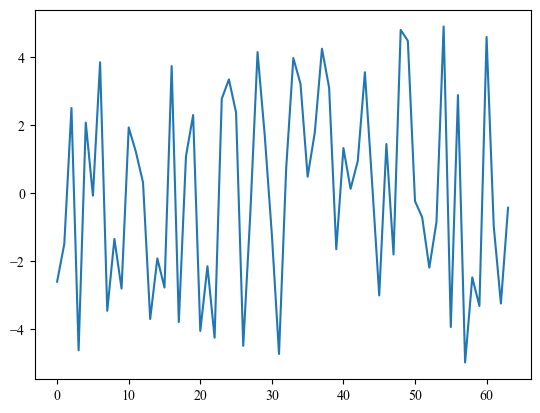

In [48]:
plt.plot(y[:,0])
plt.show()

In [49]:
resoult=list()

In [50]:
y_pred=list()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

0


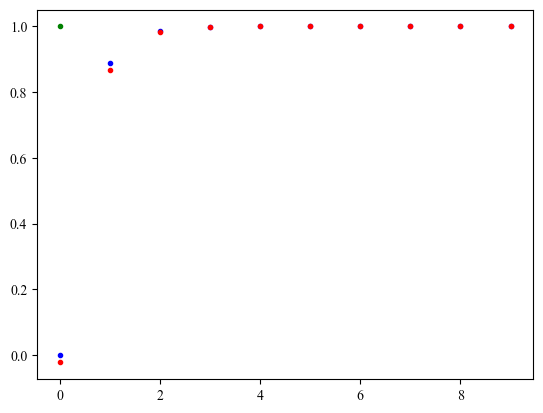

1


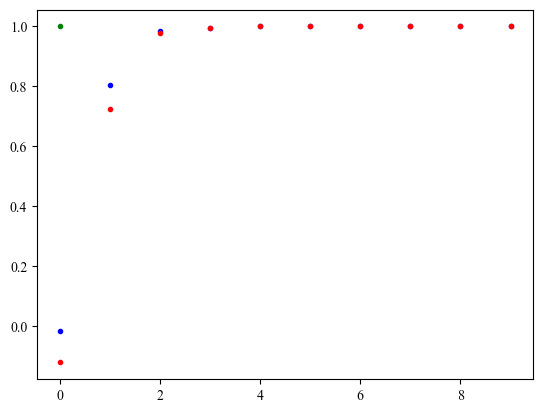

2


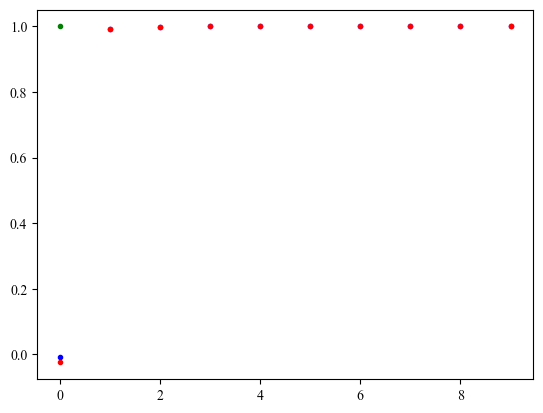

3


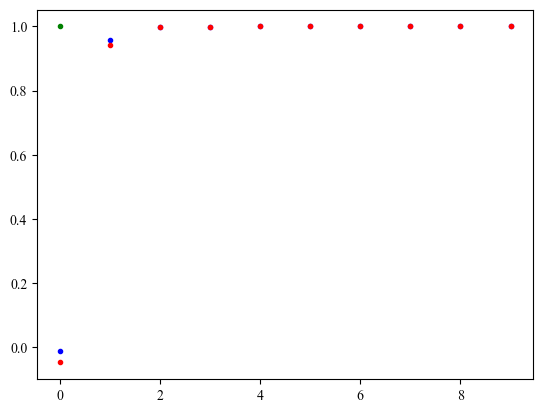

In [52]:
for i in range(4):
  print(i)
  X_train, X_test, y_train, y_test = train_test_split(
    X, y[:,i], test_size=0.1428, random_state=42)
  npls1=npls()
  scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
  parametrsNames={'n_components': range(10),
                  # 'a': np.logspace(-2, 0,num = 2)}
                  'a':[0.3]}
  
  gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,
                          refit='r2', return_train_score=True)
  gridCought.fit(X_train, y_train)
  r2_p=gridCought.score(X_test, y_test)
  mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
  mse_c=gridCought.cv_results_[ "mean_train_mse" ]
  r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
  r2_c=gridCought.cv_results_[ "mean_train_r2" ]
  resoult.append([gridCought.cv_results_,gridCought.best_params_])
  plt.plot(r2_p,".",color='green')
  plt.plot(r2_c,".",color='blue')
  plt.plot(r2_cv,".",color='red')
  plt.show()

  predictors=gridCought.predict(X)
  y_pred.append(predictors)


In [56]:
resoult[3][1]

{'a': 0.3, 'n_components': 5}

In [57]:
n_com=[5,5,5,5]

In [58]:
for i in range(4):
  y_pred[i]+=y_mean[i]
  y[:,i]+=y_mean[i]

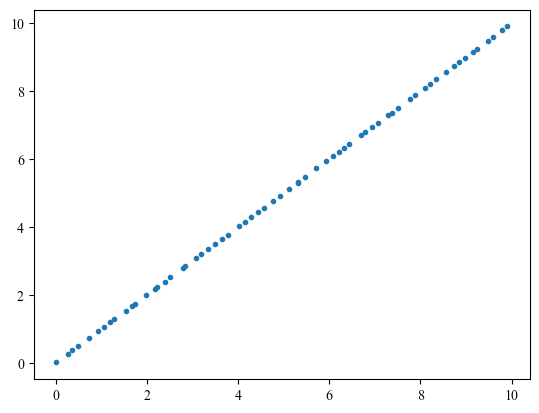

In [59]:
plt.plot(y[:,0],y_pred[0],".")
plt.show()

In [60]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error

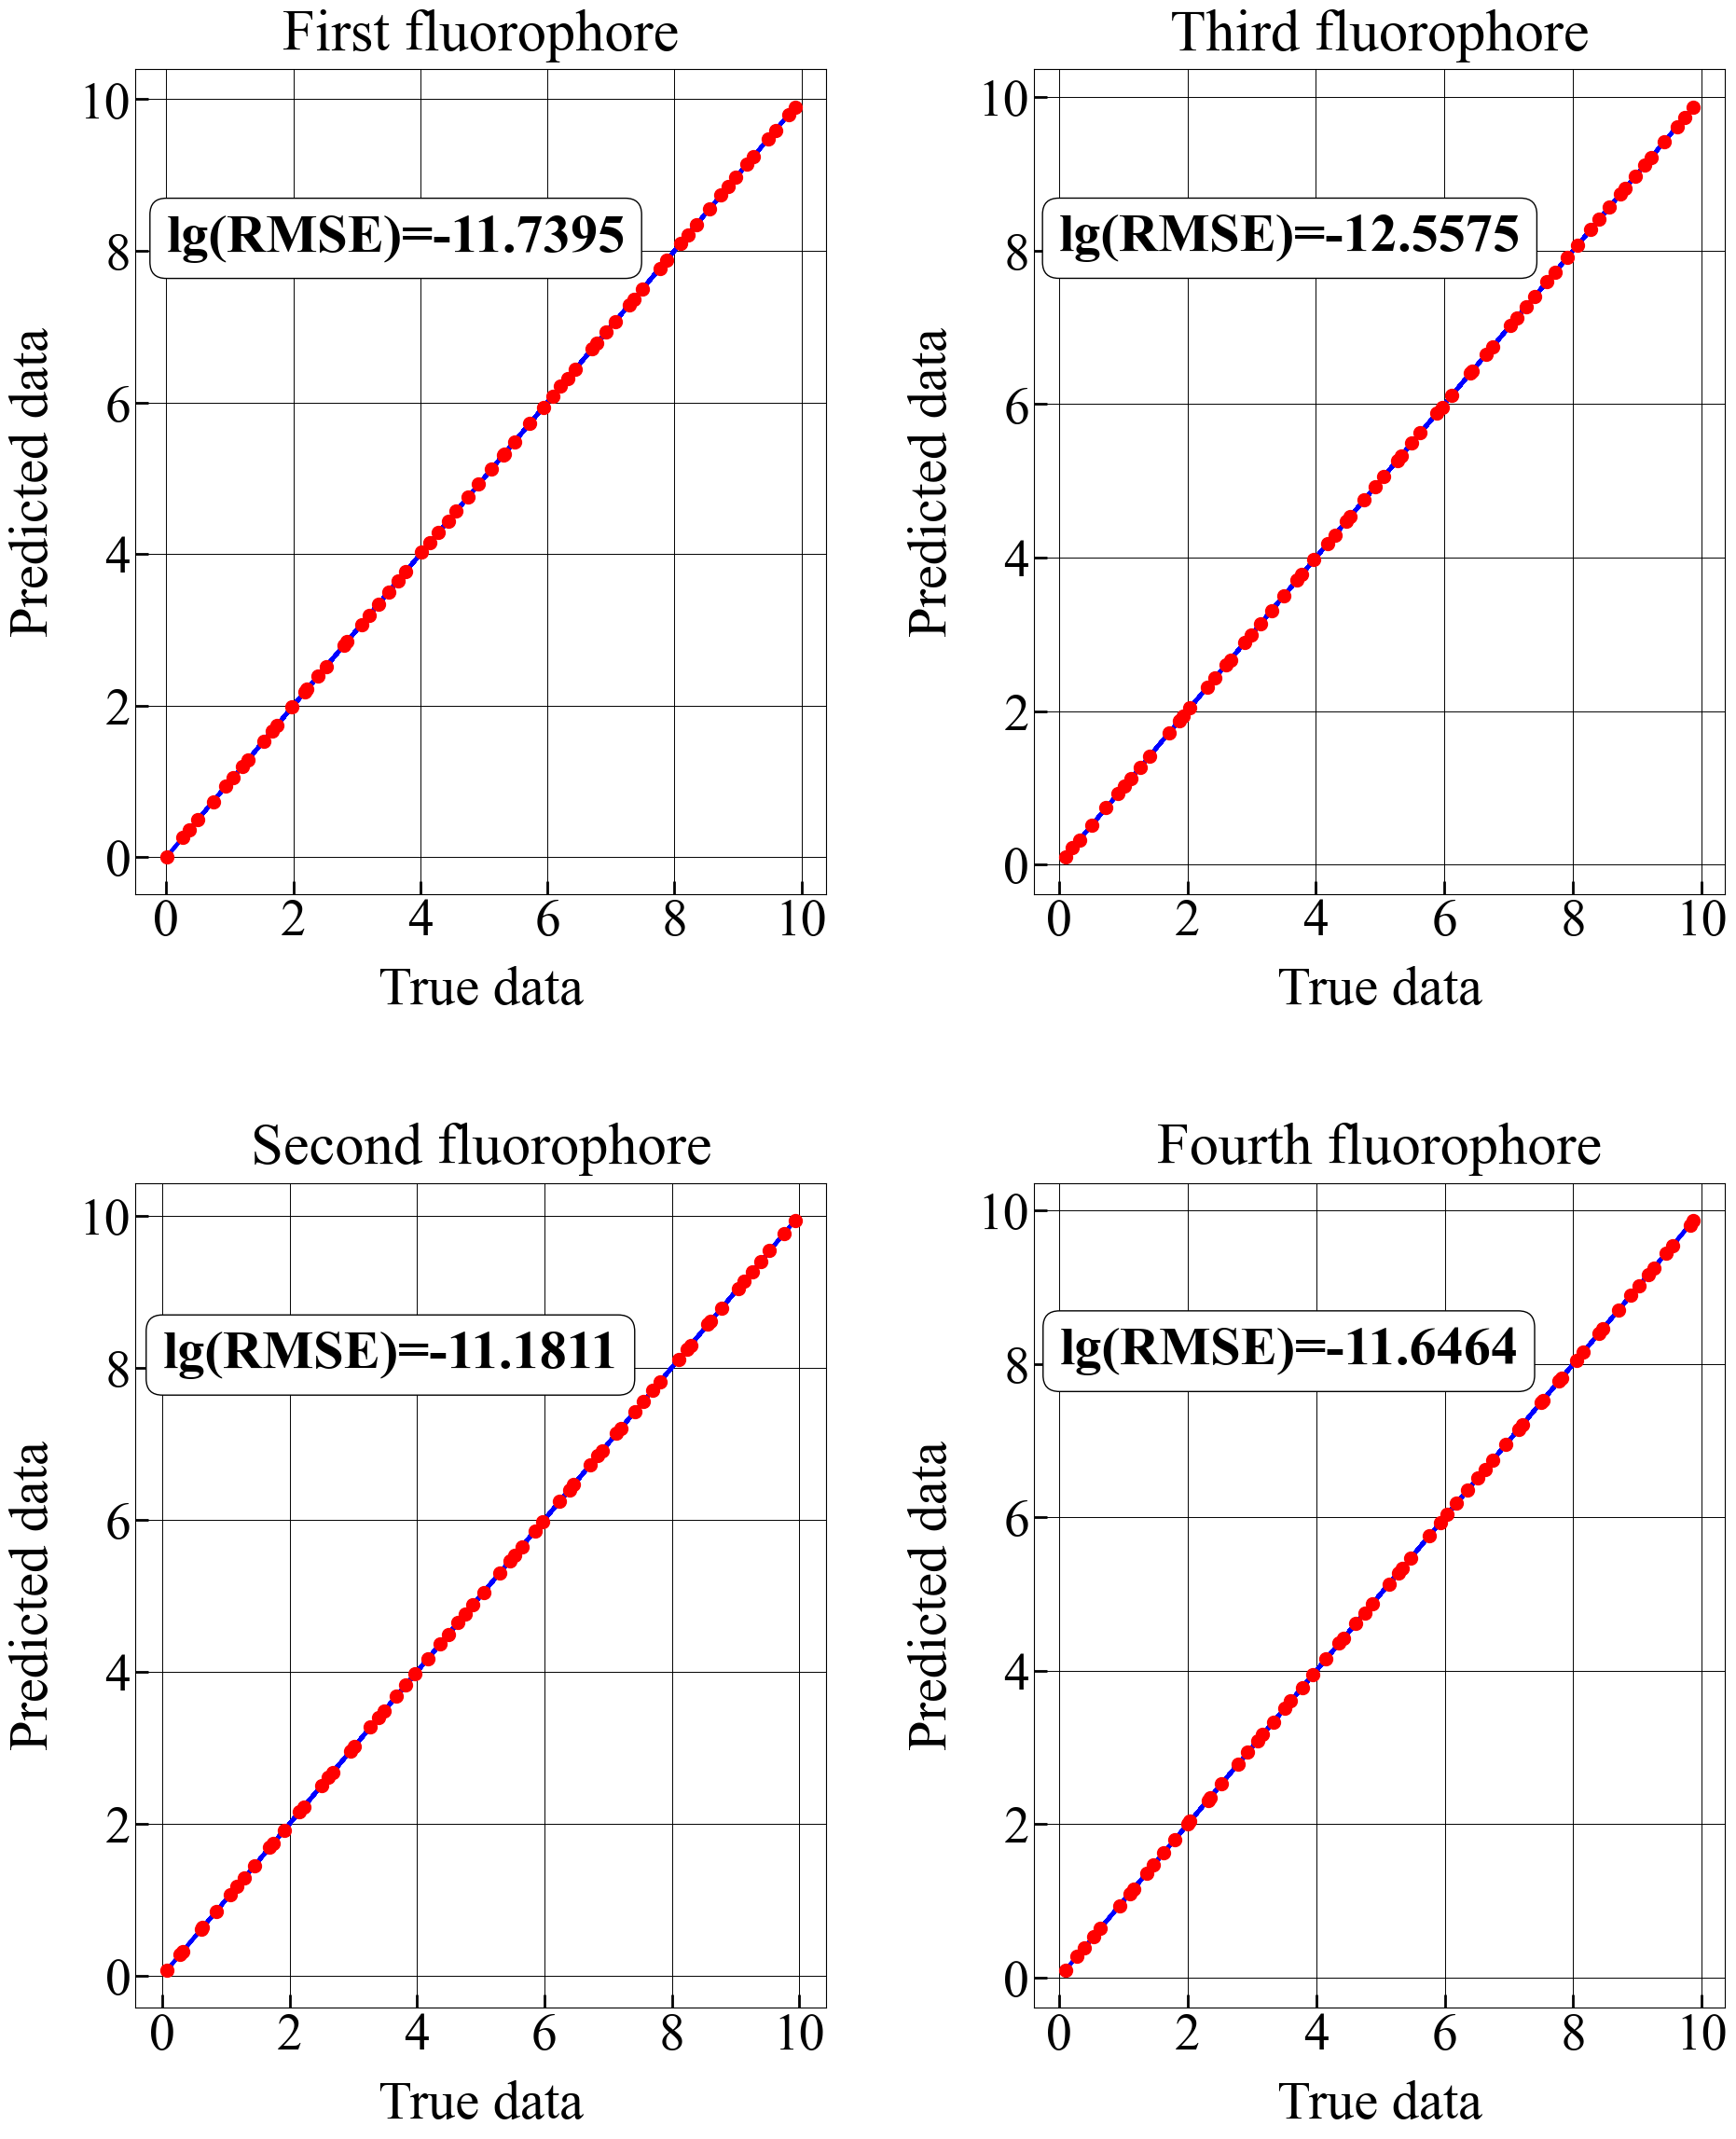

In [73]:
j=0
titLabFont=45
axLabFont=40
axNameLabFont=42
textFontSize=42
mpl.rc('font',family='Times New Roman')
fg = plt.figure(figsize=(22, 27),constrained_layout=False)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)

plt.subplots_adjust(wspace=0.3, hspace=0.35)

fig_ax_1 = fg.add_subplot(gs[0,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("First fluorophore", fontsize=titLabFont,loc="center" ,
                   pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse)
numStr=np.log10(numStr)
stri='lg(RMSE)='+f'{numStr:.4f}'
fig_ax_1.text(0,8,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("Second fluorophore", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse)
numStr=np.log10(numStr)
stri='lg(RMSE)='+f'{numStr:.4f}'
fig_ax_1.text(0,8,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1


fig_ax_1 = fg.add_subplot(gs[0,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("Third fluorophore", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse)
numStr=np.log10(numStr)
stri='lg(RMSE)='+f'{numStr:.4f}'
fig_ax_1.text(0,8,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("Fourth fluorophore", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse)
numStr=np.log10(numStr)
stri='lg(RMSE)='+f'{numStr:.4f}'
fig_ax_1.text(0,8,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

plt.savefig('../Work/images/SVG/fig2/syn_pr_join_log.svg', format='svg',bbox_inches='tight')
plt.savefig('../Work/images/PNG/fig2/syn_pr_join_log.pdf', format='pdf',dpi=300,bbox_inches='tight')
plt.show()

In [65]:
mse=mean_squared_error(y[:,0], y_pred[0])

In [71]:
np.log10(np.sqrt(mse) )

-11.64643130589535